# Import Libraries

In this section, we import the necessary libraries to the project.

In [71]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Data Information

This section includes subtitles like reading csv data file using pandas library, getting information about data, and showing statistical result for data.

**Read File**

In [3]:
data=pd.read_csv('test_data.csv')

**Read 5 Rows**

In [4]:
data.head()

,Unnamed: 0,parameter_name,bool_v,long_v,dbl_v,date,time
0,1,ProcessId,NaN,2.111210e+10,NaN,2021-11-21,06:11:59
1,2,s1,NaN,NaN,22.01,2021-11-21,06:11:59
2,3,s2,NaN,NaN,20.59,2021-11-21,06:11:59
3,4,s3,NaN,NaN,21.03,2021-11-21,06:11:59
4,5,s4,NaN,NaN,25.03,2021-11-21,06:11:59


**Show data frame shape**

In [5]:
data.shape

(154375, 7)

**Show data frame columns**

In [6]:
data.columns

Index(['Unnamed: 0', 'parameter_name', 'bool_v', 'long_v', 'dbl_v', 'date',
       'time'],
      dtype='object')

**Remove Unnamed Column**

In [7]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]   

In [8]:
data.head()

,parameter_name,bool_v,long_v,dbl_v,date,time
0,ProcessId,NaN,2.111210e+10,NaN,2021-11-21,06:11:59
1,s1,NaN,NaN,22.01,2021-11-21,06:11:59
2,s2,NaN,NaN,20.59,2021-11-21,06:11:59
3,s3,NaN,NaN,21.03,2021-11-21,06:11:59
4,s4,NaN,NaN,25.03,2021-11-21,06:11:59


**Data Types**

In [9]:
data.dtypes

parameter_name     object
bool_v            float64
long_v            float64
dbl_v             float64
date               object
time               object
dtype: object

**Checking Null Values**

In [10]:
data.isnull().sum()

parameter_name         0
bool_v            154375
long_v            143340
dbl_v              11035
date                   0
time                   0
dtype: int64

In [11]:
data.isnull().any()

parameter_name    False
bool_v             True
long_v             True
dbl_v              True
date              False
time              False
dtype: bool

**Replacing Null Values**

In [12]:
data=data.fillna(0)

In [13]:
data

,parameter_name,bool_v,long_v,dbl_v,date,time
0,ProcessId,0.0,2.111210e+10,0.00,2021-11-21,06:11:59
1,s1,0.0,0.000000e+00,22.01,2021-11-21,06:11:59
2,s2,0.0,0.000000e+00,20.59,2021-11-21,06:11:59
3,s3,0.0,0.000000e+00,21.03,2021-11-21,06:11:59
4,s4,0.0,0.000000e+00,25.03,2021-11-21,06:11:59
...,...,...,...,...,...,...
154370,s5,0.0,0.000000e+00,22.24,2021-11-18,02:02:42
154371,ProcessId,0.0,2.111180e+10,0.00,2021-11-18,05:15:07
154372,s4,0.0,0.000000e+00,24.72,2021-11-20,15:27:47
154373,s1,0.0,0.000000e+00,23.59,2021-11-18,01:35:49


**Checking Duplicate Values**

In [14]:
data.duplicated().sum()

2681

**Dropping Duplicate Values**

In [15]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

**Checking Column Values**

In [17]:
data['bool_v'].value_counts().unique

<bound method Series.unique of 0.0    151694
Name: bool_v, dtype: int64>

bool_v column includes nan value so we remove it in the data

In [18]:
data=data.drop(['bool_v'],axis=1)

In [19]:
data['long_v'].value_counts().unique

<bound method Series.unique of 0.000000e+00    140858
2.111160e+10       148
2.111160e+10        92
2.111160e+10        65
2.111160e+10        63
                 ...  
2.111180e+10        13
2.111200e+10        13
2.111190e+10        13
2.111160e+10        11
2.111160e+10         1
Name: long_v, Length: 490, dtype: int64>

In [20]:
data['dbl_v'].value_counts().unique

<bound method Series.unique of 0.00     10836
20.31      859
20.08      858
20.06      837
19.83      819
         ...  
54.32        1
57.19        1
28.03        1
51.80        1
53.44        1
Name: dbl_v, Length: 1711, dtype: int64>

**Statistical Result**

In [21]:
data.describe()

,long_v,dbl_v
count,1.516940e+05,151694.000000
mean,1.508078e+09,20.531142
std,5.437276e+09,8.261018
min,0.000000e+00,0.000000
25%,0.000000e+00,18.790000
50%,0.000000e+00,20.310000
75%,0.000000e+00,22.210000
max,2.111210e+10,58.240000


## Feature Extraction

We derived new features from existing features. The objective is to provide do a better visualization of the data.

**Extracting Year in Data**

In [22]:
data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year
data[['date','year']][:5]

,date,year
0,2021-11-21,2021
1,2021-11-21,2021
2,2021-11-21,2021
3,2021-11-21,2021
4,2021-11-21,2021


**Extracting Month in Data**

In [23]:
data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month
data[['date','month']][:5]

,date,month
0,2021-11-21,11
1,2021-11-21,11
2,2021-11-21,11
3,2021-11-21,11
4,2021-11-21,11


**Extracting Day in Data**

In [24]:
data['day'] = pd.to_datetime(data['date'], errors='coerce').dt.day
data[['date','day']][:5]

,date,day
0,2021-11-21,21
1,2021-11-21,21
2,2021-11-21,21
3,2021-11-21,21
4,2021-11-21,21


**Extracting Hour in Data**

In [25]:
data['hour'] = pd.to_datetime(data['time'], errors='coerce').dt.hour
data[['time','hour']][:5]

,time,hour
0,06:11:59,6
1,06:11:59,6
2,06:11:59,6
3,06:11:59,6
4,06:11:59,6


**Extracting Weekend in Data**

In [26]:
#data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['is_weekend'] = (pd.to_datetime(data['date'],errors='coerce').dt.dayofweek>=5).astype('int')
           
data[['date','is_weekend']][:5]

,date,is_weekend
0,2021-11-21,1
1,2021-11-21,1
2,2021-11-21,1
3,2021-11-21,1
4,2021-11-21,1


**Extracting Working Hours in Data**

In [27]:
data['working_hours'] = data['hour'].isin(np.arange(8,21,1)).astype('int')


**Extracting Weekday in Data**

In [28]:
data['weekday'] =pd.to_datetime(data['date'],errors='coerce').dt.strftime('%A')  
data[['date','weekday']].sample(5)

,date,weekday
16347,2021-11-20,Saturday
116047,2021-11-15,Monday
142096,2021-11-13,Saturday
117592,2021-11-15,Monday
99802,2021-11-16,Tuesday


In [29]:
data.head(5)

,parameter_name,long_v,dbl_v,date,time,year,month,day,hour,is_weekend,working_hours,weekday
0,ProcessId,2.111210e+10,0.00,2021-11-21,06:11:59,2021,11,21,6,1,0,Sunday
1,s1,0.000000e+00,22.01,2021-11-21,06:11:59,2021,11,21,6,1,0,Sunday
2,s2,0.000000e+00,20.59,2021-11-21,06:11:59,2021,11,21,6,1,0,Sunday
3,s3,0.000000e+00,21.03,2021-11-21,06:11:59,2021,11,21,6,1,0,Sunday
4,s4,0.000000e+00,25.03,2021-11-21,06:11:59,2021,11,21,6,1,0,Sunday


## Exloratory Data Analysis

**Count plot for all the categorical sensor features**

<bound method Series.unique of s7           10840
s2           10837
s6           10837
ProcessId    10836
s1           10836
s11          10836
s3           10835
s8           10834
s13          10834
s5           10834
s12          10834
s9           10834
s10          10834
s4           10833
Name: parameter_name, dtype: int64>

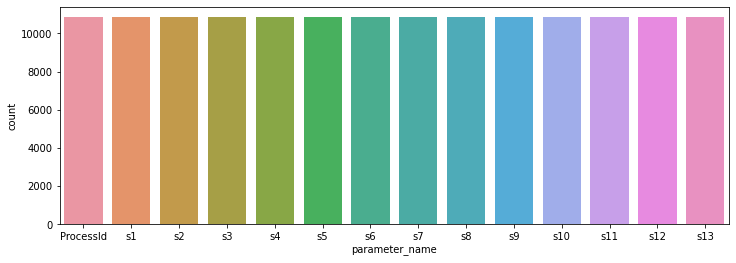

In [32]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data['parameter_name'])
data['parameter_name'].value_counts().unique

**Histogram for all the continous features**

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0.00     10836
20.31      859
20.08      858
20.06      837
19.83      819
         ...  
54.32        1
57.19        1
28.03        1
51.80        1
53.44        1
Name: dbl_v, Length: 1711, dtype: int64>

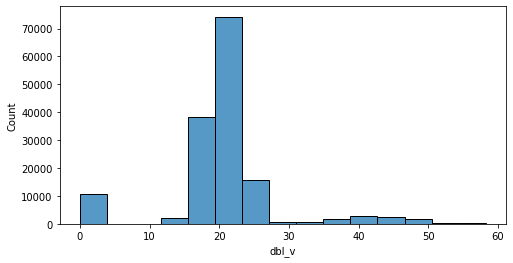

In [33]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data['dbl_v'],bins=15)
data['dbl_v'].value_counts().sum

<bound method Series.unique of 0.000000e+00    140858
2.111160e+10       148
2.111160e+10        92
2.111160e+10        65
2.111160e+10        63
                 ...  
2.111180e+10        13
2.111200e+10        13
2.111190e+10        13
2.111160e+10        11
2.111160e+10         1
Name: long_v, Length: 490, dtype: int64>

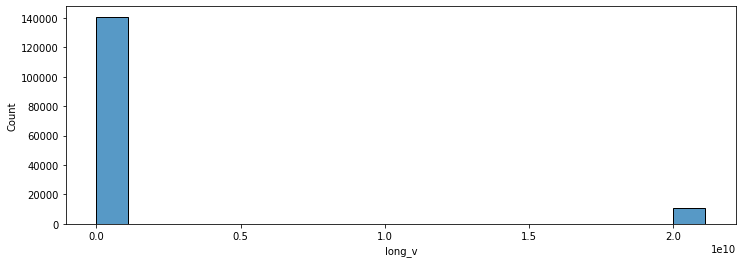

In [35]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data['long_v'])
data['long_v'].value_counts().unique

**Relationship between dbl_v and parameter_name**

<AxesSubplot:xlabel='parameter_name', ylabel='dbl_v'>

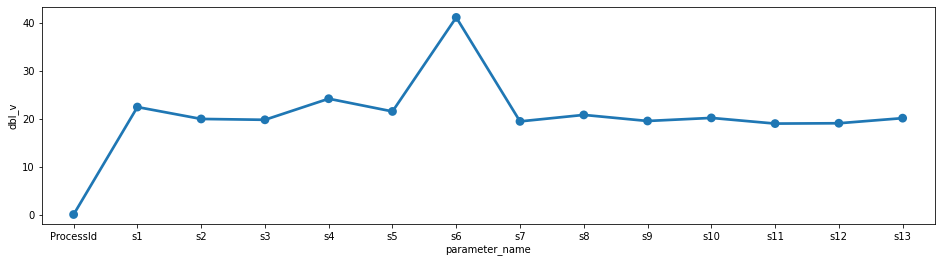

In [36]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(y='dbl_v',x='parameter_name',data=data)

The sensor 's6' has the highest 'dbl_v' value in the figure. 'ProcessId' doesn't have any value.

**Relationship between long_v and parameter_name**

<AxesSubplot:xlabel='parameter_name', ylabel='long_v'>

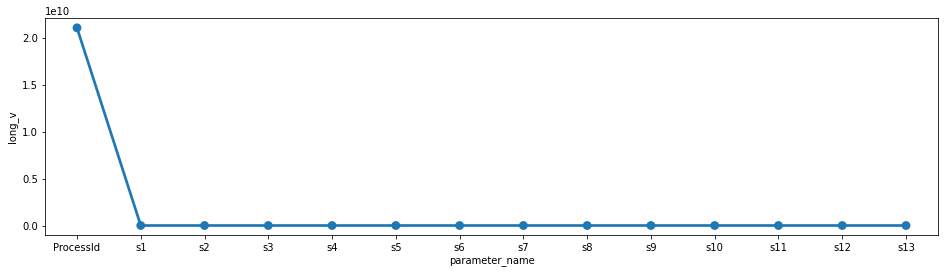

In [37]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(y='long_v',x='parameter_name',data=data)

As you can see in above the figure, all sensor doesn't have a 'long_v' value except 'ProcessId'.

**Relationship between dbl_v and weekday**

<AxesSubplot:xlabel='weekday', ylabel='dbl_v'>

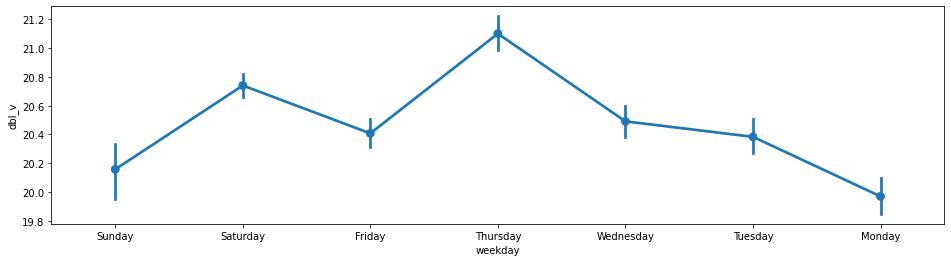

In [38]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(y='dbl_v',x='weekday',data=data)

As seen above figure, the day of Thursday has the highest 'dbl_v' value. On the contrary, Monday has the lowest 'dbl_v' value.

**Data distribution in weekend**

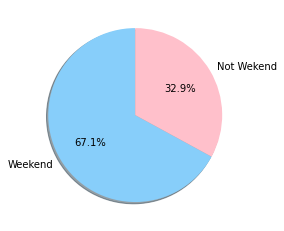

In [39]:
labels = ["Weekend","Not Wekend"]
values = data['is_weekend'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['lightskyblue', 'pink']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

The pie graph shows that weekend data is more than weekdays.

**Relationship between dbl_v and hour**

<AxesSubplot:xlabel='hour', ylabel='dbl_v'>

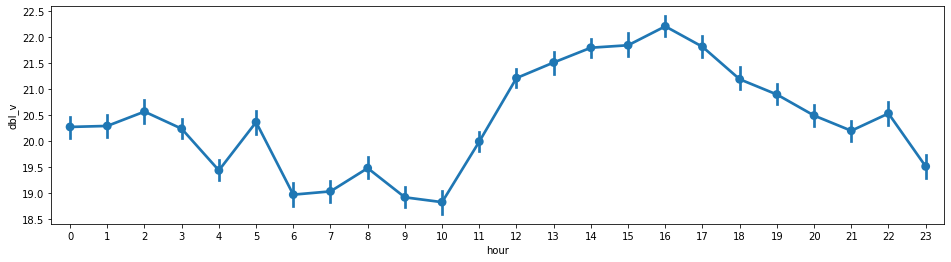

In [40]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(y='dbl_v',x='hour',data=data)

'dbl_v' is approximately 22.0 value at 16:00.Also, the lowest value is at 10:00.

**Working Hours**

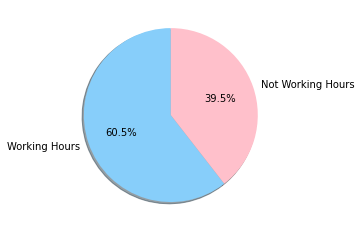

In [41]:
labels = ["Working Hours","Not Working Hours"]
values = data['working_hours'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['lightskyblue', 'pink']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

It can clearly see that working hours has a higher percentage than not working hours. The difference between them is 21%. 

**Check for outlier for 'dbl_v' value**

<AxesSubplot:xlabel='dbl_v'>

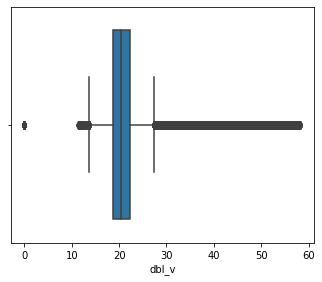

In [43]:
plt.figure(figsize=(25,20))
plt.subplot(4,4,1)
sns.boxplot(data['dbl_v'])

## Preprocessing

**Dropping extra features**

Dropping long_v, year, month, day, hour, is_weekend, working_hours and weekday attributes from dataset in order to apply regression and classification.

In [44]:
data=data.drop(['long_v'],axis=1)
data=data.drop(['year'],axis=1)
data=data.drop(['month'],axis=1)
data=data.drop(['day'],axis=1)
data=data.drop(['hour'],axis=1)
data=data.drop(['is_weekend'],axis=1)
data=data.drop(['working_hours'],axis=1)
data=data.drop(['weekday'],axis=1)

**Combining Timestamp**

Combining date and time 

In [45]:
data['datetime']=data['date'] +' '+ data['time']

Deleting date and time column 

In [46]:
data=data.drop(columns=['date', 'time'])
data

,parameter_name,dbl_v,datetime
0,ProcessId,0.00,2021-11-21 06:11:59
1,s1,22.01,2021-11-21 06:11:59
2,s2,20.59,2021-11-21 06:11:59
3,s3,21.03,2021-11-21 06:11:59
4,s4,25.03,2021-11-21 06:11:59
...,...,...,...
154105,s1,25.75,2021-11-18 16:22:36
154153,s3,21.70,2021-11-19 03:05:34
154184,s8,20.95,2021-11-17 05:05:30
154188,s9,19.08,2021-11-18 05:22:00


**Comparing all the feature values for the DateTime**

Transposing the table to show each sensor value according to DateTime.

In [47]:
data = data.pivot_table('dbl_v', ['datetime'], 'parameter_name',fill_value=0)

In [48]:
data.head(10)

parameter_name,ProcessId,s1,s10,s11,s12,s13,s2,s3,s4,s5,s6,s7,s8,s9
datetime,,,,,,,,,,,,,,
2021-11-13 01:22:43,0,20.29,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.31,34.59,19.18,19.72,19.31
2021-11-13 01:22:53,0,20.29,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.34,34.59,19.18,19.70,19.31
2021-11-13 01:23:03,0,20.26,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.34,34.65,19.16,19.67,19.29
2021-11-13 01:23:13,0,20.26,19.24,17.83,18.93,18.45,18.66,18.24,23.67,19.39,34.75,19.16,19.67,19.29
2021-11-13 01:23:23,0,20.24,19.24,17.83,18.93,18.45,18.69,18.24,23.65,19.42,34.88,19.16,19.62,19.29
2021-11-13 01:23:33,0,20.24,19.24,17.83,18.93,18.48,18.66,18.24,23.65,19.42,35.01,19.16,19.59,19.26
2021-11-13 01:23:43,0,20.24,19.24,17.80,18.93,18.48,18.66,18.24,23.67,19.44,35.13,19.16,19.62,19.24
2021-11-13 01:23:53,0,20.21,19.26,17.80,18.95,18.48,18.66,18.24,23.67,19.47,35.31,19.13,19.57,19.24
2021-11-13 01:24:03,0,20.21,19.24,17.77,18.95,18.50,18.66,18.24,23.67,19.47,35.49,19.13,19.54,19.24


**Subtracting sensor value of S5 and sensor value of S10**

Differences between sensor s5 and s10 and adding new column which name is 's5-s10'

In [49]:
data['s5-s10'] = data['s5'] - data['s10']
data.head(10)

parameter_name,ProcessId,s1,s10,s11,s12,s13,s2,s3,s4,s5,s6,s7,s8,s9,s5-s10
datetime,,,,,,,,,,,,,,,
2021-11-13 01:22:43,0,20.29,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.31,34.59,19.18,19.72,19.31,0.07
2021-11-13 01:22:53,0,20.29,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.34,34.59,19.18,19.70,19.31,0.10
2021-11-13 01:23:03,0,20.26,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.34,34.65,19.16,19.67,19.29,0.10
2021-11-13 01:23:13,0,20.26,19.24,17.83,18.93,18.45,18.66,18.24,23.67,19.39,34.75,19.16,19.67,19.29,0.15
2021-11-13 01:23:23,0,20.24,19.24,17.83,18.93,18.45,18.69,18.24,23.65,19.42,34.88,19.16,19.62,19.29,0.18
2021-11-13 01:23:33,0,20.24,19.24,17.83,18.93,18.48,18.66,18.24,23.65,19.42,35.01,19.16,19.59,19.26,0.18
2021-11-13 01:23:43,0,20.24,19.24,17.80,18.93,18.48,18.66,18.24,23.67,19.44,35.13,19.16,19.62,19.24,0.20
2021-11-13 01:23:53,0,20.21,19.26,17.80,18.95,18.48,18.66,18.24,23.67,19.47,35.31,19.13,19.57,19.24,0.21
2021-11-13 01:24:03,0,20.21,19.24,17.77,18.95,18.50,18.66,18.24,23.67,19.47,35.49,19.13,19.54,19.24,0.23


**Normalization**

Using z-normalization in order to scaling the values

In [50]:
def normalize(x):

  z=(x-x.mean())/x.std()

  return z

Normalize data 

In [51]:
ndata=normalize(data)

After normalization, variation is 1

In [53]:
print('Variation of data is ', ndata.var())


Variation of data is  parameter_name
ProcessId    NaN
s1           1.0
s10          1.0
s11          1.0
s12          1.0
s13          1.0
s2           1.0
s3           1.0
s4           1.0
s5           1.0
s6           1.0
s7           1.0
s8           1.0
s9           1.0
s5-s10       1.0
dtype: float64


Dividing 's5-s10' attribute for predicting value

In [54]:
y=ndata['s5-s10']

Deleting 's5-s10' column from data

In [55]:
X = ndata.drop('s5-s10',axis=1)
X.shape

(12857, 14)

Deleting 'Process Id' column that doesn't have any information

In [56]:
X=X.drop('ProcessId',axis=1)


**Correlation Matrix**

Correlation declares how the features are related to each other or the target variable. Correlation can be positive or negative. Heatmap makes it easy to identify which features are most related to the target variable.

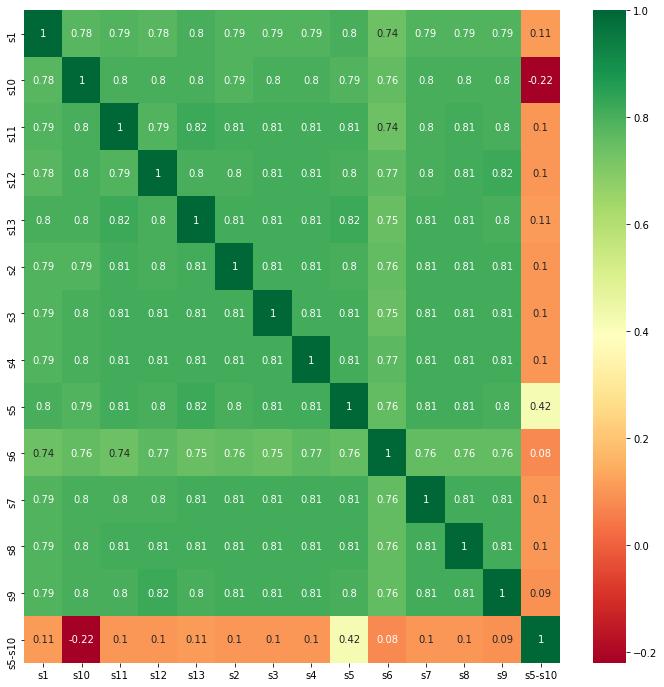

In [57]:
cormat=pd.concat([X, y], axis=1)
corr=cormat.corr().round(2)
fig=plt.figure(figsize=(12,12))
fig=sns.heatmap(corr,annot=True,cmap="RdYlGn")

## Cross Validation

We split the data into the proportion of 80% train and 20% test. We used the train_test_split of the sci-kit learn method for this task.

In [58]:
#split train and test data x_train=train data,x_test=test data, y_train=train labels, y_test=test_labels 
#%20 test %80 train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

## Regression

In [59]:
#Creating Linear Regression Model
lr = LinearRegression()
#Fit model 
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
#Estimating coefficients
lr.coef_

array([ 6.73536733e-15, -1.49115330e+00,  1.99840144e-15,  3.33066907e-15,
       -4.10782519e-15,  1.77635684e-15, -7.77156117e-16, -3.88578059e-16,
        1.60353797e+00, -4.44089210e-16,  6.10622664e-16, -6.66133815e-16,
       -1.60982339e-15])

In [72]:
y_pred=lr.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_error
import sklearn.metrics as metrics
score=r2_score(y_test,y_pred)
print('r2 score is' ,score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score is 1.0
Mean Absolute Error: 7.723248057072671e-15
Mean Squared Error: 1.1348333686699886e-28
Root Mean Squared Error: 1.0652855808045036e-14


<AxesSubplot:xlabel='s5-s10', ylabel='Density'>

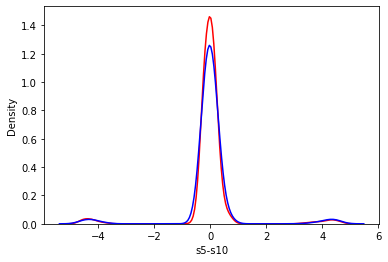

In [82]:
ax1=sns.distplot(y,hist=False,color='r',label='actual data')
sns.distplot(y_pred,hist=False,color='b',label='predicted data')

In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
datetime,,
2021-11-13 03:55:08,-0.236321,-0.236321
2021-11-19 01:45:33,0.037386,0.037386
2021-11-13 04:54:23,-0.089550,-0.089550
2021-11-19 05:51:13,0.092921,0.092921
2021-11-19 2021-11-19 03:57:53,-0.226404,-0.226404
...,...,...
2021-11-16 09:19:11,-0.037982,-0.037982
2021-11-17 2021-11-17 00:24:34,-0.226404,-0.226404
2021-11-16 02:16:03,-0.053849,-0.053849


## Classification

**Assigning Label**

Data labels are determined for classification

In [84]:
data['is_s5_minus_s10_positive']='NaN'
data['is_s5_minus_s10_positive'][data['s5-s10']>=0]='Positive'
data['is_s5_minus_s10_positive'][data['s5-s10']<0]='Negative'

In [85]:
data.head(15)

parameter_name,ProcessId,s1,s10,s11,s12,s13,s2,s3,s4,s5,s6,s7,s8,s9,s5-s10,is_s5_minus_s10_positive
datetime,,,,,,,,,,,,,,,,
2021-11-13 01:22:43,0,20.29,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.31,34.59,19.18,19.72,19.31,0.07,Positive
2021-11-13 01:22:53,0,20.29,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.34,34.59,19.18,19.70,19.31,0.10,Positive
2021-11-13 01:23:03,0,20.26,19.24,17.85,18.93,18.45,18.69,18.24,23.67,19.34,34.65,19.16,19.67,19.29,0.10,Positive
2021-11-13 01:23:13,0,20.26,19.24,17.83,18.93,18.45,18.66,18.24,23.67,19.39,34.75,19.16,19.67,19.29,0.15,Positive
2021-11-13 01:23:23,0,20.24,19.24,17.83,18.93,18.45,18.69,18.24,23.65,19.42,34.88,19.16,19.62,19.29,0.18,Positive
2021-11-13 01:23:33,0,20.24,19.24,17.83,18.93,18.48,18.66,18.24,23.65,19.42,35.01,19.16,19.59,19.26,0.18,Positive
2021-11-13 01:23:43,0,20.24,19.24,17.80,18.93,18.48,18.66,18.24,23.67,19.44,35.13,19.16,19.62,19.24,0.20,Positive
2021-11-13 01:23:53,0,20.21,19.26,17.80,18.95,18.48,18.66,18.24,23.67,19.47,35.31,19.13,19.57,19.24,0.21,Positive
2021-11-13 01:24:03,0,20.21,19.24,17.77,18.95,18.50,18.66,18.24,23.67,19.47,35.49,19.13,19.54,19.24,0.23,Positive


Counting positive and negative labels

In [86]:
data['is_s5_minus_s10_positive'].value_counts().unique

<bound method Series.unique of Positive    11645
Negative     1212
Name: is_s5_minus_s10_positive, dtype: int64>

Bar plot for positive and negative labels 

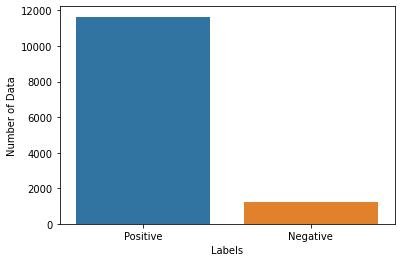

In [87]:
x=data['is_s5_minus_s10_positive'].value_counts().values
plot=sns.barplot(["Positive","Negative"],x)
plot.set(xlabel='Labels', ylabel='Number of Data')
plt.show()

Selecting positive and negative values as labels 

In [88]:
labels=data['is_s5_minus_s10_positive']

Deleting labels from data

In [89]:
data=data.drop('is_s5_minus_s10_positive',axis=1)


Deleting 's5-s10' column from data in order to avoid overfitting

In [90]:
data=data.drop('s5-s10',axis=1)

**Normalize Data**

Normalizing data for classification

In [91]:
X=normalize(data)

ProcessId column does not have any information, for this reason, we removed it.

In [92]:
X=X.drop('ProcessId',axis=1)

**Cross Validation**

We split the data into the proportion of 80% train and 20% test. Also, each class sample is split with this rate. We used the train_test_split of the sci-kit learn method for this task.

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=.2, random_state=1,stratify=labels)

**Classification Methods**

We used five different machine learning algorithms to train and test the dataset. These algorithms are Logistic Regression,Random Forest, Naive Bayes, K-Nearest Neighbor, and Support Vector Machine. The purpose of using different machine learning algorithms is to compare the results and measure the performance of the model.

**1)Random Forest**

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#create model
rf = RandomForestClassifier(n_estimators=25,random_state=4)
#fit model
rf.fit(x_train,y_train)
#predict test data
y_test_pred2 = rf.predict(x_test)
#calculate classification accuray
rf_acc=accuracy_score(y_test_pred2,y_test)

#print classification result
print("Classification Accuracy:"+str(round(rf_acc*100,2)))
print("\n0:Negative, 1:Positive")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Classification Accuracy:99.53

0:Negative, 1:Positive
Confusion Matrix:
[[ 234    4]
 [   8 2326]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.98      0.97       238
    Positive       1.00      1.00      1.00      2334

    accuracy                           1.00      2572
   macro avg       0.98      0.99      0.99      2572
weighted avg       1.00      1.00      1.00      2572



**2)Support Vector Machine**

In [97]:
#create a support vector model
svc = SVC(kernel = 'rbf', random_state = 42)
#fit model
svc.fit(x_train, y_train)
#predict test data
y_test_pred6 = svc.predict(x_test)
#calculate classification accuracy
svc_acc=accuracy_score(y_test_pred6,y_test)

#Print classification results
print("Classification Accuracy:"+str(round(svc_acc*100,2)))
print("\n0:Negative, 1:Positive")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Classification Accuracy:93.58

0:Negative, 1:Positive
Confusion Matrix:
[[  77    0]
 [ 165 2330]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.32      1.00      0.48        77
    Positive       1.00      0.93      0.97      2495

    accuracy                           0.94      2572
   macro avg       0.66      0.97      0.72      2572
weighted avg       0.98      0.94      0.95      2572



**3)Logistic Regression**

In [98]:
lr = LogisticRegression(penalty='l2',C=0.1)

#fit model
lr.fit(x_train,y_train)
#predict test 
y_test_pred1 = lr.predict(x_test)
#calculate classification accuracy
lr_acc=accuracy_score(y_test_pred1,y_test)

#Print classification results
print("Classification Accuracy:"+str(round(lr_acc*100,2)))
print("\n0:Negative, 1:Positive")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Classification Accuracy:93.12

0:Negative, 1:Positive
Confusion Matrix:
[[  67    2]
 [ 175 2328]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.28      0.97      0.43        69
    Positive       1.00      0.93      0.96      2503

    accuracy                           0.93      2572
   macro avg       0.64      0.95      0.70      2572
weighted avg       0.98      0.93      0.95      2572



**4)K-Neighboors**

In [99]:
#create a KNeighboors Classifier model
knn=KNeighborsClassifier(n_neighbors=5)
#fit model
knn.fit(x_train,y_train)
#predict test data
y_test_pred3 = knn.predict(x_test)
#calculate classification accuracy
knn_acc=accuracy_score(y_test_pred3,y_test)

#print classification results
print("Classification Accuracy:"+str(round(knn_acc*100,2)))
print("\n0:Negative, 1:Positive")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Classification Accuracy:98.72

0:Negative, 1:Positive
Confusion Matrix:
[[ 219   10]
 [  23 2320]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.96      0.93       229
    Positive       1.00      0.99      0.99      2343

    accuracy                           0.99      2572
   macro avg       0.95      0.97      0.96      2572
weighted avg       0.99      0.99      0.99      2572



**5)Naive Bayes**

In [100]:
nb = GaussianNB()
#fit model
nb.fit(x_train,y_train)
#predict test data 
y_test_pred4 = nb.predict(x_test)
#calculate classification accuracy
nb_acc=accuracy_score(y_test_pred4,y_test)

#print classification results
print("Classification Accuracy:"+str(round(nb_acc*100,2)))
print("\n0:Negative, 1:Positive")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))

Classification Accuracy:92.85

0:Negative, 1:Positive
Confusion Matrix:
[[  58    0]
 [ 184 2330]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.24      1.00      0.39        58
    Positive       1.00      0.93      0.96      2514

    accuracy                           0.93      2572
   macro avg       0.62      0.96      0.67      2572
weighted avg       0.98      0.93      0.95      2572



## Comparing Accuracy of Model

Random Forest has the highest accuracy when we compare other algorithms.As seen in the figure, KNN, SVM,Logistic Regression, and Naive Bayes follow the Random Forest respectively.

Text(0.5, 1.0, 'Model Accuracies')

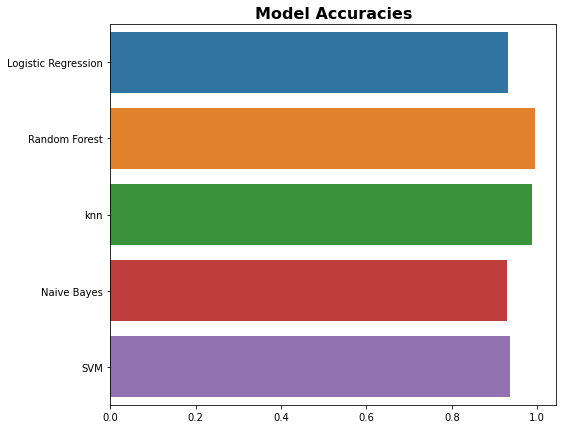

In [101]:
plt.figure(figsize= (8,7))
ac = [lr_acc,rf_acc,knn_acc,nb_acc,svc_acc]
name = ['Logistic Regression','Random Forest','knn','Naive Bayes','SVM']
sns.barplot(x = ac,y = name)
plt.title("Model Accuracies", fontsize=16, fontweight="bold")